<a href="https://colab.research.google.com/github/GENAMAGDY/Numerical_Optimization/blob/main/Momentum_NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
Y = -1*X+2

In [ ]:
print("X = ",X)
print("Y = ",Y)

X =  [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y =  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

#### Plot your data points. 

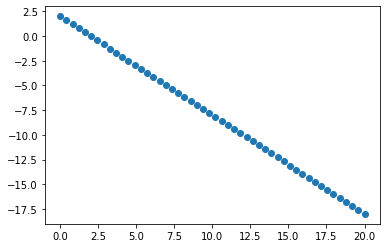

In [ ]:
plt.scatter(X,Y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [ ]:
def GradientDescent(X,Y,Learning_Rate,Iteration):
    Theta =[0,0]
    m = len(X)
   
    Loss_history = []
    Theta_0_his=[]
    Hypotheses_history =[]
    Theta_1_his =[]
    
    i=0
    for i in range(Iteration):
        Hypotheses = Theta[0] + Theta[1]*X
        Hypotheses_history.append(Hypotheses)
        
        CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
        Loss_history.append(CostFn)
        
        Theta[0] -= (Learning_Rate/m)*np.sum(Hypotheses - Y)
        Theta_0_his.append(Theta[0])
        
        Theta[1] -= (Learning_Rate/m)*np.sum((Hypotheses - Y)*X)
        Theta_1_his.append(Theta[1])
        
        error = CostFn
        if error <= 0.000001:
            break
   
    Hypotheses = Theta[0] + Theta[1]*X
    Hypotheses_history.append(Hypotheses)
    
    
    CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
    print("Number of Iterations Stop = ", i)
    return Loss_history ,Theta_0_his  ,Theta_1_his,Hypotheses_history,Theta

In [ ]:
Loss_history ,Theta_0_his  ,Theta_1_his,Hypotheses_history,Theta = GradientDescent(X,Y,0.01,1000)
Theta

Number of Iterations Stop =  999


[1.8413018478211218, -0.9881954144718033]

In [ ]:
r2_score(Y,Hypotheses_history[-1])

0.9998130177293859

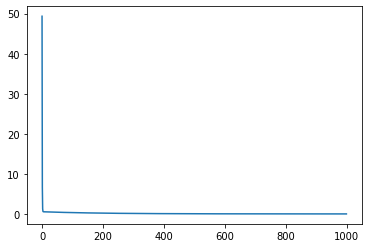

In [ ]:
plt.plot(Loss_history)
plt.show()

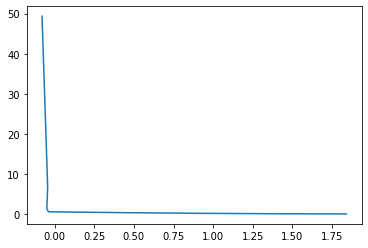

In [ ]:
plt.plot(Theta_0_his,Loss_history)
plt.show()

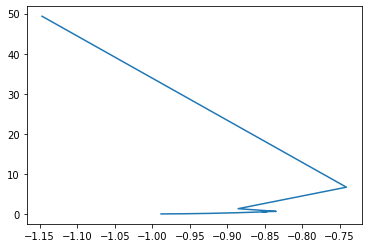

In [ ]:
plt.plot(Theta_1_his,Loss_history)
plt.show()

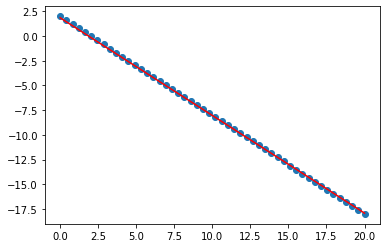

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_history[-1],color='Red')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

![image.png](attachment:image.png)

#### γ takes values between 0 and 1.
![image.png](attachment:image.png)

In [ ]:
def Momentum_Based_GD(X,Y,Learning_Rate,Iteration,Gamma):
    Theta =[0,0]
    m = len(X)
   
    Loss_history = []
    Theta_0_his=[]
    Hypotheses_history =[]
    Theta_1_his =[]
    v_0=[0]
    v_1=[0]
    i =0
    
    for i in range(Iteration):
        Hypotheses = Theta[0] + Theta[1]*X
        Hypotheses_history.append(Hypotheses)
        
        CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
        Loss_history.append(CostFn)
        
        v_0_next = v_0[-1]*Gamma + (Learning_Rate/m)*np.sum(Hypotheses - Y)
        v_0.append(v_0_next)
        Theta[0] -= v_0_next
        Theta_0_his.append(Theta[0])
        
        v_1_next = v_1[-1]*Gamma + (Learning_Rate/m)*np.sum((Hypotheses - Y)*X)
        v_1.append(v_1_next)
        Theta[1] -= v_1_next
        Theta_1_his.append(Theta[1])
        
        
        error = CostFn
        if  error <= 0.000001:
            break
   
    Hypotheses = Theta[0] + Theta[1]*X
    Hypotheses_history.append(Hypotheses)
    
    CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)
    print("Number of Iteration Stop = ", i)
    return Loss_history ,Theta_0_his  ,Theta_1_his,Hypotheses_history,Theta

In [ ]:
Loss_history_M ,Theta_0_his_M  ,Theta_1_his_M,Hypotheses_history_M,Theta_M = Momentum_Based_GD(X,Y,0.01,1000,0.9)
Theta_M

Number of Iteration Stop =  180


[1.997596114981475, -0.9997510990554469]

In [ ]:
r2_score(Y,Hypotheses_history_M[-1])

0.9999999378394596

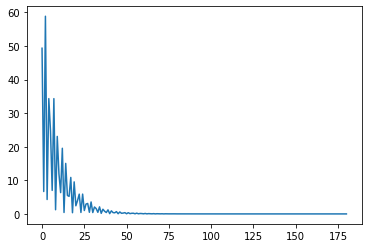

In [ ]:
plt.plot(Loss_history_M)
plt.show()

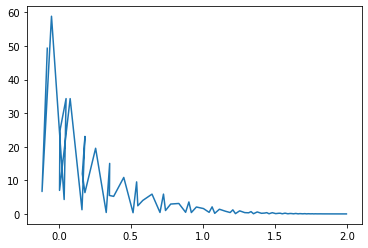

In [ ]:
plt.plot(Theta_0_his_M,Loss_history_M)
plt.show()

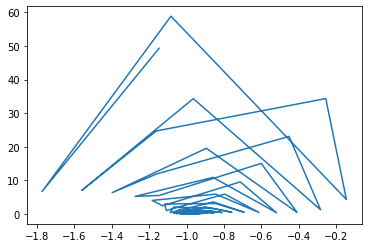

In [ ]:
plt.plot(Theta_1_his_M,Loss_history_M)
plt.show()

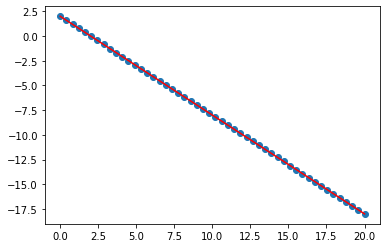

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_history_M[-1],color='Red')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [ ]:
Loss_history_M ,Theta_0_his_M  ,Theta_1_his_M,Hypotheses_history_M,Theta_M = Momentum_Based_GD(X,Y,0.01,1000,0)
Theta_M

Number of Iteration Stop =  999


[1.8413018478211218, -0.9881954144718033]

In [ ]:
r2_score(Y,Hypotheses_history_M[-1])

0.9998130177293859

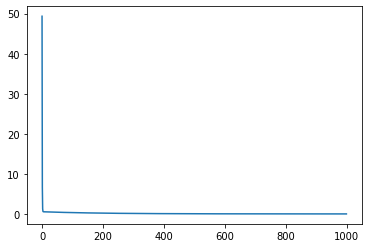

In [ ]:
plt.plot(Loss_history_M)
plt.show()

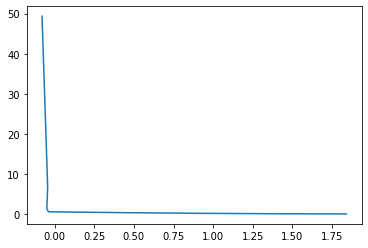

In [ ]:
plt.plot(Theta_0_his_M,Loss_history_M)
plt.show()

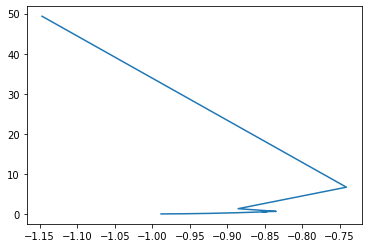

In [ ]:
plt.plot(Theta_1_his_M,Loss_history_M)
plt.show()

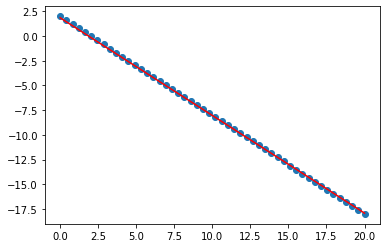

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_history_M[-1],color='Red')
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

![image.png](attachment:image.png)

In [ ]:
def NAG(X,Y,Learning_Rate,Iteration,Gamma):
    Theta =[0,0]
    m = len(X)
   
    Loss_history = []
    Theta_0_his=[]
    Hypotheses_history =[]
    Theta_1_his =[]
    v_0=[0]
    v_1=[0]
    i =0
    
    for i in range(Iteration):

        w_temp_0=Theta[0]- Gamma*v_0[-1]
        w_temp_1=Theta[1]-Gamma*v_1[-1]

        Hypotheses = w_temp_0 + w_temp_1*X
    
       
        Theta[0] = w_temp_0 - (Learning_Rate/m)*np.sum(Hypotheses - Y)
        v_0_next = v_0[-1]*Gamma + (Learning_Rate/m)*np.sum(Hypotheses - Y)

        v_0.append(v_0_next)
        Theta_0_his.append(Theta[0])

        
     
        Theta[1] = w_temp_1 - (Learning_Rate/m)*np.sum((Hypotheses - Y)*X)
        v_1_next = v_1[-1]*Gamma + (Learning_Rate/m)*np.sum((Hypotheses - Y)*X)
        v_1.append(v_1_next)
        Theta_1_his.append(Theta[1])

        Hypotheses = Theta[0] + Theta[1]*X
        Hypotheses_history.append(Hypotheses)
        CostFn = (1/(2*m))*np.sum((Hypotheses - Y)**2)

        Loss_history.append(CostFn)
        error = CostFn
        if  error <= 0.000001:
            break
   

    print("Number of Iteration Stop : ", i)
    return Loss_history ,Theta_0_his  ,Theta_1_his, Hypotheses_history, Theta

In [ ]:
Loss_history_N ,Theta_0_his_N  ,Theta_1_his_N,Hypotheses_history_N,Theta_N = NAG(X,Y,0.01,1000,0.9)
Theta_N

Number of Iteration Stop :  999


[2.000090343621754, -0.9987854409797584]

In [ ]:
r2_score(Y,Hypotheses_history_N[-1])

0.9999942094430034

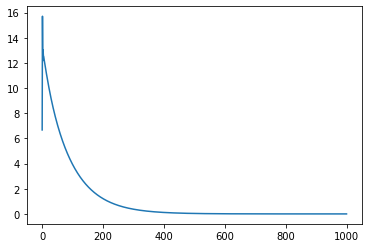

In [ ]:
plt.plot(Loss_history_N)
plt.show()

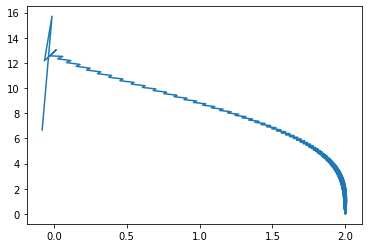

In [ ]:
plt.plot(Theta_0_his_N,Loss_history_N)
plt.show()

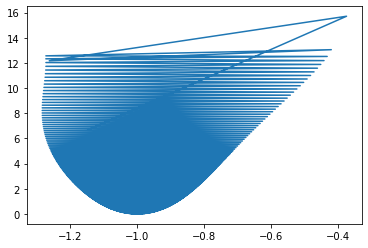

In [ ]:
plt.plot(Theta_1_his_N,Loss_history_N)
plt.show()

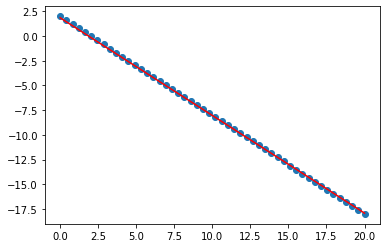

In [ ]:
plt.scatter(X,Y)
plt.plot(X,Hypotheses_history_M[-1],color='Red')
plt.show()

## Congratulations 
![image.png](attachment:image.png)